<a href="https://colab.research.google.com/github/StetskoSergey/pida5_stetsko/blob/master/aml6%20%D0%B2%D1%82%D0%BE%D1%80%D1%8F%20%D1%87%D0%B0%D1%81%D1%82%D1%8C%20dz%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание
Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. 
Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [0]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [0]:
# Скачиваем и предобрабатываем все 4 тома 

with open('tom_1.txt', 'r') as f:
    text_ = f.read().lower()
text = re.sub('[^ а-я]','', text_)

with open('tom_2.txt', 'r') as f:
    text_ = f.read().lower()
text = text + re.sub('[^ а-я]','', text_)

with open('tom_3.txt', 'r') as f:
    text_ = f.read().lower()
text = text + re.sub('[^ а-я]','', text_)

with open('tom_4.txt', 'r') as f:
    text_ = f.read().lower()
text = text + re.sub('[^ а-я]','', text_)

russian = ' абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(russian)}

probabilities = np.zeros((len(russian), len(russian)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in russian), columns=(c for c in russian))


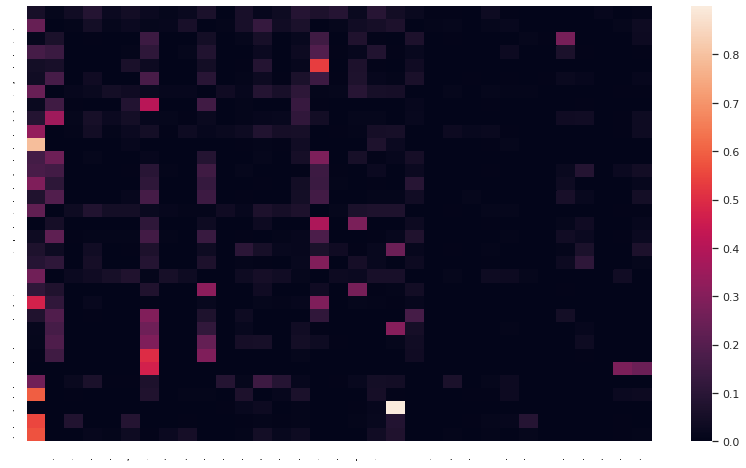

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [20]:
# выведем вероятность слова из 4 букв, и покажем количество таких возможных слов
start = POS['п']
end = POS['р']
result =0
count = 0
prior = 1. / len(russian)
for c in russian[1:]:
  for d in russian[1:]:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end] 
    if proba > 0:
        result += proba
        count += 1

print(f'Вероятность слова из 4 букв {result}, всего вариантов слов {count}')        

Вероятность слова из 4 букв 0.0008358370458724394, всего вариантов слов 600


In [36]:
# сгенерируе  слово с б длиной 8 букв
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бу ем нак


In [38]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 2.8MB/s 


In [0]:
from hmmlearn.hmm import GaussianHMM

series = pd.read_csv("daily-total-female-births-in-cal.csv")["Count"]
values = series.values.reshape(-1,1)

In [42]:
# выберем оптимальное количество состояний

for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932182
2 -1231.4145479769188
3 -1228.6376241958358
4 -1222.4806144371303
5 -1214.0826449646763
6 -1207.2247974052
7 -1200.056669976935
8 -1191.2110155143369
9 -1173.4922234634762
10 -1160.5066601735114
11 -1157.4320513170433
12 -1155.300857819788
13 -1129.7855849169819


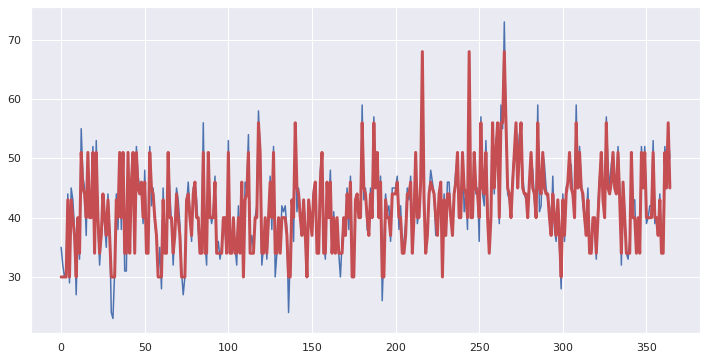

In [44]:
# Возьмем модель с 12 состояниями

model = GaussianHMM(n_components=12,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3, c='r')

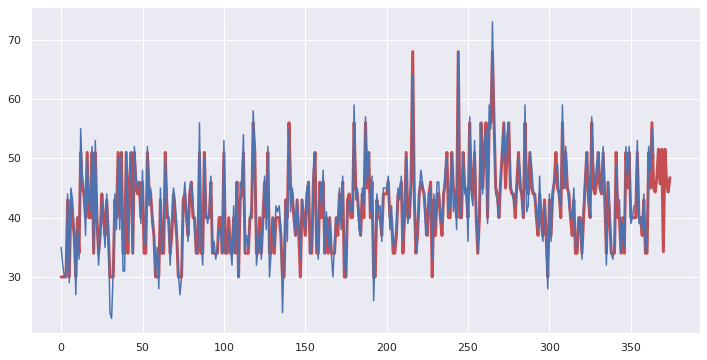

In [61]:
# Построим предсказания на n шагов
n = 10 
prognos = means
last_label = labels[-1]
for i in range(n):
  last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
  prognos = np.concatenate((prognos, model.means_[last_label].reshape(-1,1)))

plt.figure(figsize=(12, 6))
plt.plot(prognos, linewidth=3, c='r')
plt.plot(values)  